In [1]:
import numpy as np                  
import matplotlib.pyplot as plt                     
import scipy as scp  
from scipy.optimize import curve_fit
import statistics as st
import sympy as sp 
from IPython.display import Latex
from scipy.optimize import minimize

Wavelength = 618.5024 nm


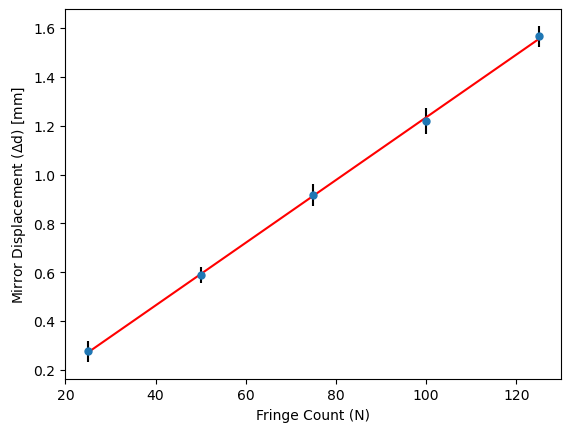

In [2]:
D1 = np.array([0.24, 0.55, 0.87, 1.16, 1.52])
D2 = np.array([0.26, 0.60, 0.95, 1.26, 1.61])
D3 = np.array([0.36, 0.64, 0.97, 1.29, 1.60])
D4 = np.array([0.27, 0.60, 0.93, 1.22, 1.59])
D5 = np.array([0.25, 0.56, 0.86, 1.16, 1.51])
d = [D1, D2, D3, D4, D5]
D = (D1+D2+D3+D4+D5)/5
N = np.array([25, 50, 75, 100, 125])

std = []

for i in range(len(D)):
    elements_at_position = [arr[i] for arr in d]
    std_dev = np.std(elements_at_position)
    
    std.append(std_dev)

a, b = np.polyfit(N, D, 1)

print('Wavelength =', a*2*0.0241*10**(-3)*10**9, 'nm')

plt.errorbar(N, D, yerr=std, ecolor='black', fmt='o', ms=5)
plt.plot(N, a*N+b, color='red')
plt.xlabel('Fringe Count (N)')
plt.ylabel(r'Mirror Displacement ($\Delta$d) [mm]')
plt.show()

Refractive Index = 1.151583980042957


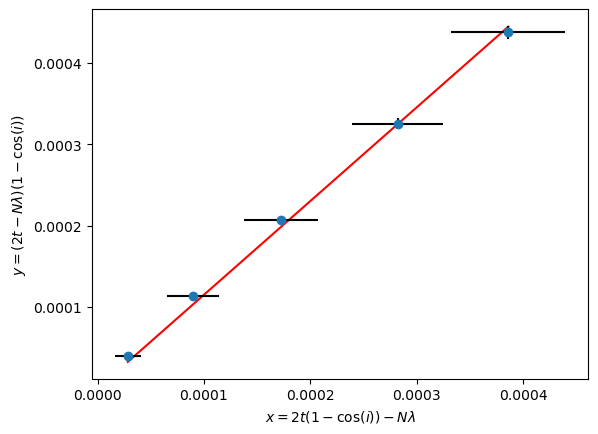

In [11]:
N = np.array([20, 40, 60, 80, 100])
i1 = np.array([10, 16, 20, 24, 30])*np.pi/180
i2 = np.array([10, 18, 26, 36, 42])*np.pi/180
i3 = np.array([10, 16, 24, 28, 32])*np.pi/180
i4 = np.array([10, 18, 24, 30, 34])*np.pi/180
i5 = np.array([10, 16, 20, 26, 30])*np.pi/180

i_list = [i1, i2, i3, i4, i5]

i = (i1+i2+i3+i4+i5)/5

w = 618.5*10**(-9)
t = 1.34*10**(-3)

x = 2*t*(1-np.cos(i))-N*w
y = (2*t-N*w)*(1-np.cos(i))

std = []

for j in range(len(i)):
    elements_at_position = [arr[j] for arr in i_list]
    std_dev = np.std(elements_at_position)
    
    std.append(std_dev)
    
x_err = np.abs(2*t*(1-np.cos(std))-N*w)
y_err = np.abs((2*t-N*w)*(1-np.cos(std)))

n = ((2*t-N*w)*(1-np.cos(i)))/(2*t*(1-np.cos(i))-N*w)

def f(x, a):
    return a*x

par, cov = curve_fit(f, x, y)

print('Refractive Index =', par[0])

plt.plot(x, par[0]*x, color='red')
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='black')
plt.xlabel(r'$x = 2t(1-\cos(i))-N\lambda$')
plt.ylabel(r'$y = (2t-N\lambda)(1-\cos(i))$')
theta = plt.show()

29.256838769758968 -4.780349013449432
Intensity (I_0) = 16.298 mA


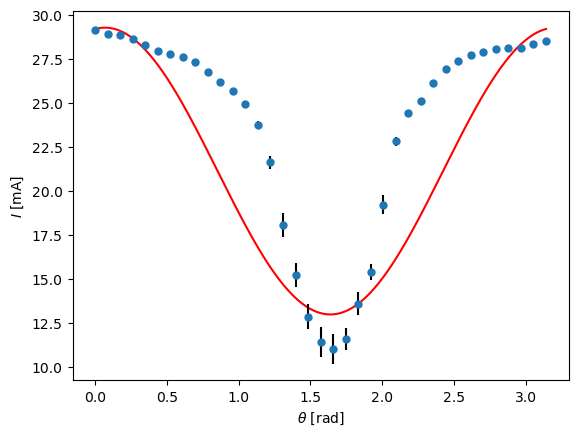

In [12]:
theta = np.array([0, 5, 10, 15, 20, 25,30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 
                  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180])*np.pi/180
I1 = np.array([29.2, 28.8, 28.7, 28.5, 28.1, 27.9, 27.8, 27.6, 27.4, 26.9, 26.2, 25.6, 24.9, 23.6, 21.5, 18.1, 16.4, 14.2, 13.0,
              12.6, 12.7, 14.9, 16.2, 19.9, 23.2, 24.6, 25.3, 26.2, 27.0, 27.5, 27.8, 28.0, 28.1, 28.1, 28.0, 28.3, 28.4])
I2 = np.array([29.1, 28.9, 28.9, 28.7, 28.2, 28.0, 27.8, 27.6, 27.2, 26.7, 26.2, 25.7, 25.1, 24.0, 22.2, 18.6, 14.7, 12.5, 11.4,
              10.9, 11.6, 13.5, 15.4, 19.1, 22.6, 24.3, 25.1, 26.1, 26.8, 27.3, 27.6, 27.8, 28.0, 28.1, 28.2, 28.3, 28.6])
I3 = np.array([29.1, 28.8, 28.7, 28.4, 28.1, 27.8, 27.8, 27.6, 27.3, 26.7, 26.2, 25.6, 24.8, 23.7, 21.2, 17.5, 15.0, 12.9, 11.3,
              10.8, 11.2, 13.2, 15.2, 19.7, 22.8, 24.4, 25.2, 26.2, 27.1, 27.5, 27.8, 27.9, 28.0, 28.1, 28.0, 28.3, 28.5])
I4 = np.array([29.1, 28.9, 28.8, 28.6, 28.3, 27.9, 27.8, 27.6, 27.3, 26.8, 26.2, 25.6, 24.8, 23.5, 21.3, 17.1, 14.5, 12.4, 10.9,
              10.5, 10.8, 13.1, 14.8, 18.8, 22.9, 24.3, 25.1, 26.2, 27.0, 27.5, 27.8, 27.9, 28.0, 28.0, 28.0, 28.2, 28.4])
I5 = np.array([29.1, 29.0, 29.0, 28.8, 28.6, 28.0, 27.7, 27.5, 27.2, 26.7, 26.1, 25.7, 25.1, 23.9, 21.8, 18.9, 15.4, 12.2, 10.5,
              10.2, 11.6, 13.2, 15.3, 18.5, 22.5, 24.3, 24.7, 25.8, 26.6, 27.1, 27.5, 27.9, 28.1, 28.2, 28.2, 28.4, 28.5])
I = (I1+I2+I3+I4+I5)/5

I_list = [I1, I2, I3, I4, I5]

I_std = []

for j in range(len(I)):
    elements_at_position = [arr[j] for arr in I_list]
    std_dev = np.std(elements_at_position)
    
    I_std.append(std_dev)

I_err = I_std

def f(x, a, b, c):
    return a*(np.cos(x+c))**2+b

par, cov = curve_fit(f, theta, I)

angle = np.linspace(0, np.pi, 1000)

P = -2
Q = -1.5

print(par[1]+Q, par[2])

print('Intensity (I_0) =', np.round(np.abs(par[0]+P),3), 'mA')

plt.plot(angle, (par[0]+P)*(np.cos(angle+par[2]))**2+par[1]+Q, color='red')
plt.errorbar(theta, I, yerr=I_err, ms=5, fmt='o', ecolor='black')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$I$ [mA]')
plt.show()

minima = 53.05046433440144


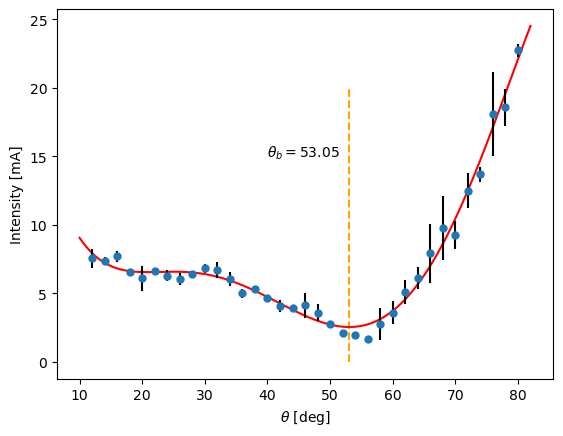

In [14]:
#Brewster Angle 

#in milliA
I_B1 = np.array([7.3, 7.2, 7.4, 6.3, 4.8, 6.6, 5.7, 5.4, 6.5, 7.3, 7.5, 6.8, 4.6, 5.6, 4.6, 3.5, 3.9, 5.4, 4.4, 
                 2.9, 2.0, 1.8, 2.0, 4.4, 4.4, 5.7, 6.7, 10.9, 13.0, 8.2, 14.3, 13.6, 22.4, 20.5, 23.4])

I_B2 = np.array([8.5, 7.1, 8.3, 6.8, 6.7, 6.9, 6.6, 6.4, 6.5, 6.7, 6.6, 5.7, 5.0, 5.3, 4.7, 4.4, 4.2, 3.6, 3.5, 
                 2.6, 2.1, 2.1, 1.6, 2.1, 4.0, 5.8, 6.7, 7.0, 8.9, 10.6, 11.7, 14.4, 16.0, 17.8, 22.5])

I_B3 = np.array([6.9, 7.8, 7.4, 6.6, 6.8, 6.4, 6.6, 6.3, 6.3, 6.5, 6.1, 5.7, 5.4, 5.1, 4.8, 4.4, 3.8, 3.4, 2.9,
                 2.7, 2.2, 1.9, 1.4, 1.8, 2.4, 3.9, 5.0, 5.9, 7.5, 9.0, 11.5, 13.1, 15.8, 17.4, 22.3])

I_B = (I_B1+I_B2 + I_B3)/3

a = np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 
              62, 64, 66, 68, 70, 72, 74, 76, 78, 80])

p = np.polyfit(a, I_B, 5)

I_Blist = [I_B1, I_B2, I_B3]

I_Bstd = []

for j in range(len(I_B)):
    elements_at_position = [arr[j] for arr in I_Blist]
    std_dev = np.std(elements_at_position)
    
    I_Bstd.append(std_dev)

I_Berr = I_Bstd
    
x = np.linspace(10, 82, 700)

def poly(x):
    return p[0]*x**5+p[1]*x**4+p[2]*x**3+p[3]*x**2+p[4]*x+p[5]

brew = minimize(poly, 56, method='BFGS')

print('minima =', brew.x[0])

plt.vlines(brew.x[0], 0, 20, color='orange', ls='--')
plt.plot(x, p[0]*x**5+p[1]*x**4+p[2]*x**3+p[3]*x**2+p[4]*x+p[5], color='red')
plt.errorbar(a, I_B, yerr=I_Berr, ecolor='black', fmt='o', ms=5)
plt.text(40, 15, r'$\theta_b = $'+str(np.round(brew.x[0], 2)))
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Intensity [mA]')
plt.show()

minima = 54.632882772292476


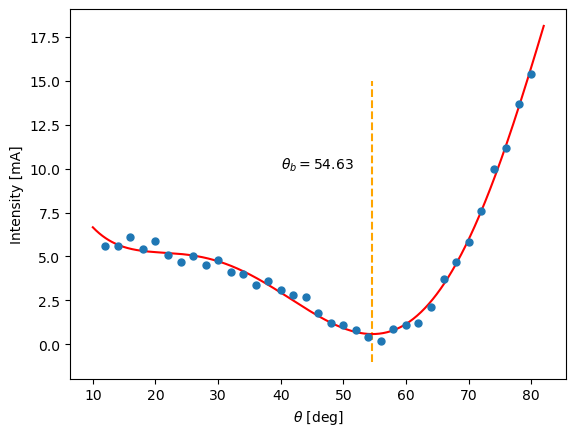

In [17]:
I_p = np.array([5.6, 5.6, 6.1, 5.4, 5.9, 5.1, 4.7, 5.0, 4.5, 4.8, 4.1, 4.0, 3.4, 3.6, 3.1, 2.8, 2.7, 1.8, 1.2, 
                1.1, 0.8, 0.4, 0.2, 0.9, 1.1, 1.2, 2.1, 3.7, 4.7, 5.8, 7.6, 10.0, 11.2, 13.7, 15.4])
ap = np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60,
              62, 64, 66, 68, 70, 72, 74, 76, 78, 80])

p = np.polyfit(ap, I_p, 5)
    
x = np.linspace(10, 82, 700)

def poly(x):
    return p[0]*x**5+p[1]*x**4+p[2]*x**3+p[3]*x**2+p[4]*x+p[5]

brew = minimize(poly, 56, method='BFGS')    

print('minima =', brew.x[0])

plt.vlines(brew.x[0], -1, 15, color='orange', ls='--')
plt.plot(x, p[0]*x**5+p[1]*x**4+p[2]*x**3+p[3]*x**2+p[4]*x+p[5], color='red')
plt.errorbar(ap, I_p, ecolor='black', fmt='o', ms=5)
plt.text(40, 10, r'$\theta_b = $'+str(np.round(brew.x[0], 2)))
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Intensity [mA]')
plt.show()